In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
import pandas as pd,numpy as np
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
##Changing all the categorical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [32]:
df[['furnishingstatus']].value_counts()

furnishingstatus
semi-furnished      227
unfurnished         178
furnished           140
dtype: int64

In [33]:
cat_variables = [i for i in df.columns if df[i].dtype=='O']
cat_variables

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [34]:
for i in cat_variables:
    df[i] = encoder.fit_transform(df[i])

In [35]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [36]:
df['furnishingstatus'].value_counts()

1    227
2    178
0    140
Name: furnishingstatus, dtype: int64

In [37]:
dt = DecisionTreeRegressor(random_state=42,max_depth=4,min_samples_leaf=10)

In [38]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)
df_train.shape,df_test.shape

((381, 13), (164, 13))

In [39]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,2
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,2


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train['price'] = scaler.fit_transform(df_train[['price']])
df_test['price'] = scaler.transform(df_test[['price']])

In [41]:
df_train[['price']]

,price
359,0.169697
19,0.615152
159,0.321212
35,0.548133
28,0.575758
...,...
526,0.048485
53,0.484848
350,0.175758
79,0.424242


In [42]:
y_train = df_train.pop("price")
X_train = df_train

y_test = df_test.pop("price")
X_test = df_test

In [43]:
X_train.shape,X_test.shape

((381, 12), (164, 12))

In [44]:
y_train,y_test

(359    0.169697
 19     0.615152
 159    0.321212
 35     0.548133
 28     0.575758
          ...   
 526    0.048485
 53     0.484848
 350    0.175758
 79     0.424242
 520    0.060606
 Name: price, Length: 381, dtype: float64,
 265    0.229697
 54     0.484848
 171    0.303030
 244    0.242424
 268    0.227879
          ...   
 413    0.145455
 191    0.284848
 310    0.206061
 46     0.500000
 50     0.490909
 Name: price, Length: 164, dtype: float64)

### Fit the Decision Tree model

In [45]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

In [47]:
df_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,3600,3,1,1,1,0,0,0,0,1,0,2
19,6420,3,2,2,1,0,0,0,1,1,1,1
159,3150,3,2,1,1,1,1,0,1,0,0,0
35,7000,3,2,4,1,0,0,0,1,2,0,0
28,7950,5,2,2,1,0,1,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
526,3180,2,1,1,1,0,0,0,0,0,0,2
53,5150,3,2,4,1,0,0,0,1,2,0,1
350,3420,2,1,2,1,0,0,1,0,1,0,1
79,6000,3,2,3,1,1,0,0,1,0,0,0


In [50]:
y_train.describe()

count    381.000000
mean       0.260333
std        0.157607
min        0.000000
25%        0.151515
50%        0.221212
75%        0.345455
max        1.000000
Name: price, dtype: float64

In [51]:
## Predict the decision tree model
y_pred = dt.predict(X_test)
y_pred

array([0.17844971, 0.47919192, 0.29271562, 0.20105601, 0.20105601,
       0.20105601, 0.59024318, 0.47919192, 0.20251748, 0.3930303 ,
       0.20105601, 0.20105601, 0.27915152, 0.29271562, 0.20105601,
       0.27915152, 0.59024318, 0.20105601, 0.3930303 , 0.17844971,
       0.20105601, 0.20105601, 0.17844971, 0.20251748, 0.1123764 ,
       0.1123764 , 0.20105601, 0.27915152, 0.59024318, 0.25830303,
       0.17844971, 0.20105601, 0.20105601, 0.1123764 , 0.29271562,
       0.20105601, 0.27915152, 0.17844971, 0.17844971, 0.20105601,
       0.17844971, 0.27915152, 0.40285985, 0.1123764 , 0.1123764 ,
       0.20105601, 0.20105601, 0.27915152, 0.20105601, 0.29271562,
       0.1123764 , 0.3912987 , 0.3912987 , 0.29271562, 0.47919192,
       0.20105601, 0.3930303 , 0.20105601, 0.1123764 , 0.20105601,
       0.1123764 , 0.17844971, 0.3912987 , 0.47919192, 0.1123764 ,
       0.29271562, 0.3930303 , 0.20105601, 0.1123764 , 0.20105601,
       0.1123764 , 0.27915152, 0.20105601, 0.20105601, 0.29271

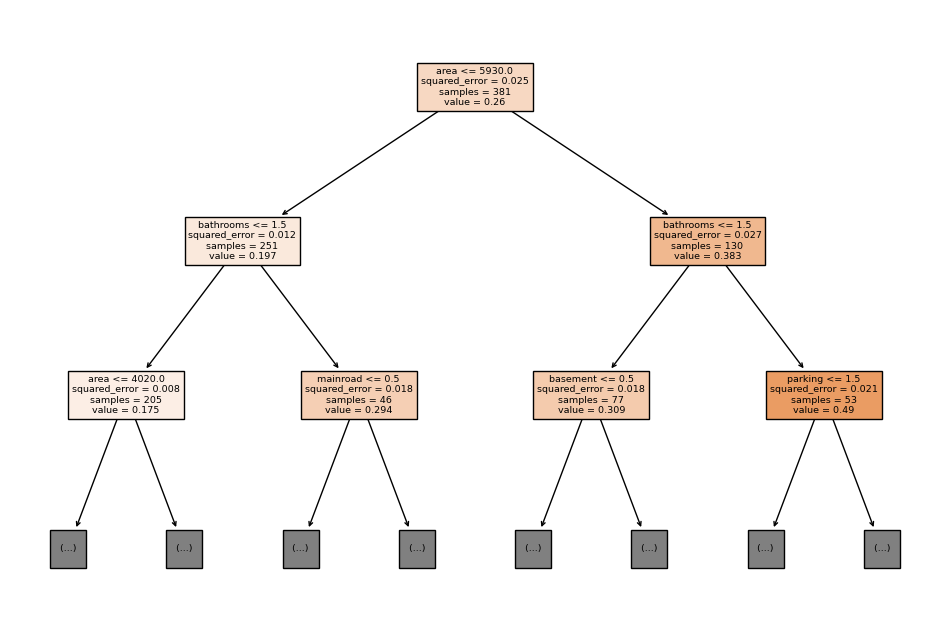

In [58]:
##plotting the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dt,filled=True,max_depth=2,feature_names=X_train.columns)
plt.show()

In [59]:
from sklearn.metrics import r2_score
y_train_pred = dt.predict(X_train)

In [60]:
r2_score(y_train,y_train_pred)

0.6234560022579934

In [61]:
r2_score(y_test,y_pred)

0.5289772624972271

### Regression using Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rf= RandomForestRegressor(random_state=42,n_jobs=-1,max_depth=5,min_samples_leaf=10)

In [65]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [66]:
sample_tree = rf.estimators_[1]

In [71]:
rf.estimators_

[DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=1608637542),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=1273642419),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=1935803228),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=787846414),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=996406378),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=1201263687),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=423734972),
 DecisionTreeRegressor(max_depth=5, max_features=1.0, min_samples_leaf=10,
                       random_state=415968276),
 DecisionTre

In [72]:
def get_dt_graph(model):
    from sklearn import tree
    plt.figure(figsize=(12,8))
    tree.plot_tree(model,filled=True,rounded=True)
    plt.show(block=False)

In [78]:
def evaluate_model(dt_classifier):
    print("Train set performance")
    print(r2_score(y_train,dt_classifier.predict(X_train)))

    print("-"*50)
    print("Test set performance")
    print(r2_score(y_test,dt_classifier.predict(X_test)))
    

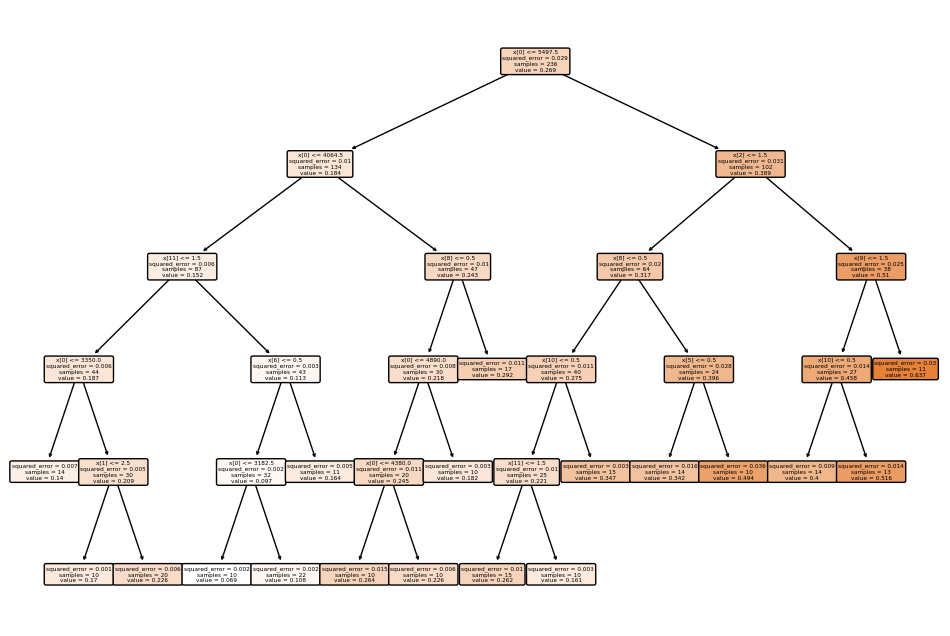

In [73]:
get_dt_graph(sample_tree)

In [76]:
model = rf.estimator_

In [77]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [79]:
evaluate_model(model)

Train set performance
0.9984486155583219
--------------------------------------------------
Test set performance
0.29831133708616553


- As per the model performancer the model is extremely overfitting.

### Feature importances

In [80]:
model.feature_importances_

array([0.48595672, 0.04755409, 0.16778349, 0.04403001, 0.01305031,
       0.01439395, 0.03813161, 0.00908037, 0.0224981 , 0.05015417,
       0.04401522, 0.06335196])

In [81]:
imp = pd.DataFrame({
    'Varname':X_train.columns,
    'Imp': model.feature_importances_
})
imp

,Varname,Imp
0,area,0.485957
1,bedrooms,0.047554
2,bathrooms,0.167783
3,stories,0.044030
4,mainroad,0.013050
5,guestroom,0.014394
6,basement,0.038132
7,hotwaterheating,0.009080
8,airconditioning,0.022498
9,parking,0.050154


In [83]:
imp.sort_values(by='Imp',ascending=False)

,Varname,Imp
0,area,0.485957
2,bathrooms,0.167783
11,furnishingstatus,0.063352
9,parking,0.050154
1,bedrooms,0.047554
3,stories,0.044030
10,prefarea,0.044015
6,basement,0.038132
8,airconditioning,0.022498
5,guestroom,0.014394


- Here 'Area' seems  to be the most important feature.